<div align="right">Python 3.6 Jupyter Notebook</div>

# Visual communication
## Geocoding and markdown examples

### Your completion of the notebook exercises will be graded based on your ability to do the following:

> **Apply**: Are you able to execute code (using the supplied examples) that performs the required functionality on supplied or generated data sets?

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

> **Create**: Are you able to produce notebooks that serve as computational records of a session, and which can be used to share your insights with others? 

In [ ]:
#### Notebook objectives
By the end of this notebook, you will be expected to be able to use geocoding within Python and communicate your ideas using markdown.
 
####  List of exercises
>   - Exercise 1: Plot student count.
  - Exercise 2: Markdown.

# Notebook introduction
Working with data helps you make informed decisions. There is a wealth of information in the form of articles about being "data driven". There have also been technological and systems development best practices for a couple of decades, many of which contain great input and guidelines.

One of the biggest problems we are facing with tools, technology, and best practices is the rate of change. David Shrier discusses the concept of the half-life of data in the video content in this module. The half-life of tools, technologies, and best practices in the information technology industry is also shortening.

Your enrollment in this course demonstrates your ability to see value in data-driven approaches, and the opportunities that advances in technology bring. As you continue your journey, you will discover additional sources of information, such as the rich communities on [GitHub](https://github.com/search?utf8=%E2%9C%93&q=data+science), where users share code and learn from others.

This notebook works through an example containing data from the students enrolled in this course. In many cases, you will need to enrich your existing data sets, as changing the collection process is not always an option. This notebook demonstrates how country and city locations (in text format) can be utilized to geocode cities to locations that can be plotted on a map.

While you should not share answers with classmates, you are encouraged to ask for assistance, and post examples and syntax structures that you have found helpful, on the forums.

<div class="alert alert-warning">
<b>Note</b>:<br>
It is strongly recommended that you save and checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.
</div>

#### Load libraries and set options

In [2]:
# Load relevant libraries.
import pandas as pd
#import pandas_profiling
import ydata_profiling
import numpy as np
import matplotlib
import folium
import geocoder
# create progress bars for iterable objects in Python, such as lists or loops. 
# The word "tqdm" is Arabic, which means "progress".
from tqdm import tqdm
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. Introduction to geocoding
Geocoding is the process of transforming a description of a location into a spatial (physical) location on the earth’s surface. You can geocode by entering one location’s description at a time or by simultaneously providing multiple descriptions in a table.

## 1.1 Geocoder
There are several geocoding libraries and services available. This notebook demonstrates the use of the [Geocoder](https://pypi.python.org/pypi/geocoder/) Python library, using [Google Maps](https://maps.google.com) as the provider.

Start by geocoding a single city and country combination. You can change the values of the city, should you wish to do so.

**API Key**: [The Google Maps Geocoding API](https://developers.google.com/maps/documentation/geocoding/cloud-setup) requires an API key. If you don't have one, it will not return a result. You can generate an API key from the Google Cloud Console.

%env GOOGLE_API_KEY="your_api_key_here"

In [3]:
import os
import geocoder

# retrieve the GOOGLE_API_KEY environment variable
api_key = os.getenv("GOOGLE_API_KEY")

# ensure the API key was retrieved successfully
if api_key is None:
    print("Error: GOOGLE_API_KEY environment variable not set")
else:
    g = geocoder.google('236 Owashika Road Lavington Nairobi, Kenya', key=api_key)
#print(g.debug())
# Print the latitude and longitude for the city.
print(g.latlng)


Error: GOOGLE_API_KEY environment variable not set


NameError: name 'g' is not defined

You can use the same library to find the location, based on IP addresses. When executing this in your virtual analysis environment, the location of the server will be returned.

In [12]:
# Find your location based on your IP address.
mylocation = geocoder.ip('me')

# Print your location.
mylocation.latlng

[-1.2833, 36.8167]

## 1.2 Input data: Student location

An earlier snapshot of the student group has been extracted, a new unique identifier generated, and the industry, country, and city have been included. The aim here is to show you what can be achieved with minimal input.

### 1.2.1 Load the data

In [8]:
# Load student location data and display the header.
df = pd.read_csv('students_raw.csv')
df.head()

,id,industry,country,city
0,10001,Agriculture,United States,Davis
1,10002,Arts & Education,Australia,Perth
2,10003,Arts & Education,Austria,Lieboch
3,10004,Arts & Education,Brazil,São Paulo
4,10005,Arts & Education,Canada,Georgetown


Consider the forms and applications that you complete regularly. While you may be happy to share your personal information with the company providing you with a product or service, it is highly likely that you would be unhappy if that company started sharing your information publicly. Many people provide this data on social media and public forums, and do not necessarily consider the potential consequences.

One of the techniques to hide sensitive data is to only release aggregated data. The greatest disadvantage of this approach is that you are still able to identify people in low-density areas of the data set. You need to be extremely careful when designing applications that utilize personal data to ensure that you do not breach the trust of the users who have supplied you with their data.

Names, surnames, telephone numbers, and email addresses have been removed, however, you may still be able to identify students. This will be demonstrated later in this course.

### 1.2.2 Prepare the data

In [9]:
# Step 1: Group the data to hide the user id.
df1 = pd.DataFrame(df.groupby(['country', 'city', 'industry'])['id'].count()).reset_index()
df1 = df1.rename(columns = {'id':'student_count'})
df1.head(10)

,country,city,industry,student_count
0,Australia,Adelaide,Other or Unknown,1
1,Australia,Bronte,Other or Unknown,1
2,Australia,Buddina,ICT,1
3,Australia,Carlingford,ICT,1
4,Australia,Glen Waverley,ICT,1
5,Australia,Haberfield,ICT,1
6,Australia,Kellyville,Other or Unknown,1
7,Australia,Kogarah Bay,Other or Unknown,1
8,Australia,Logan,Other or Unknown,1
9,Australia,Manly,Other or Unknown,1


### 1.2.3 Retrieve the data for a specific city

In [10]:
# Return all rows for New York.
df1.loc[df1['city'] == 'New York']

,country,city,industry,student_count
554,United States,New York,Arts & Education,3
555,United States,New York,ICT,3
556,United States,New York,Media & Marketing,3
557,United States,New York,Other or Unknown,5


### 1.2.4 Plot the students per country

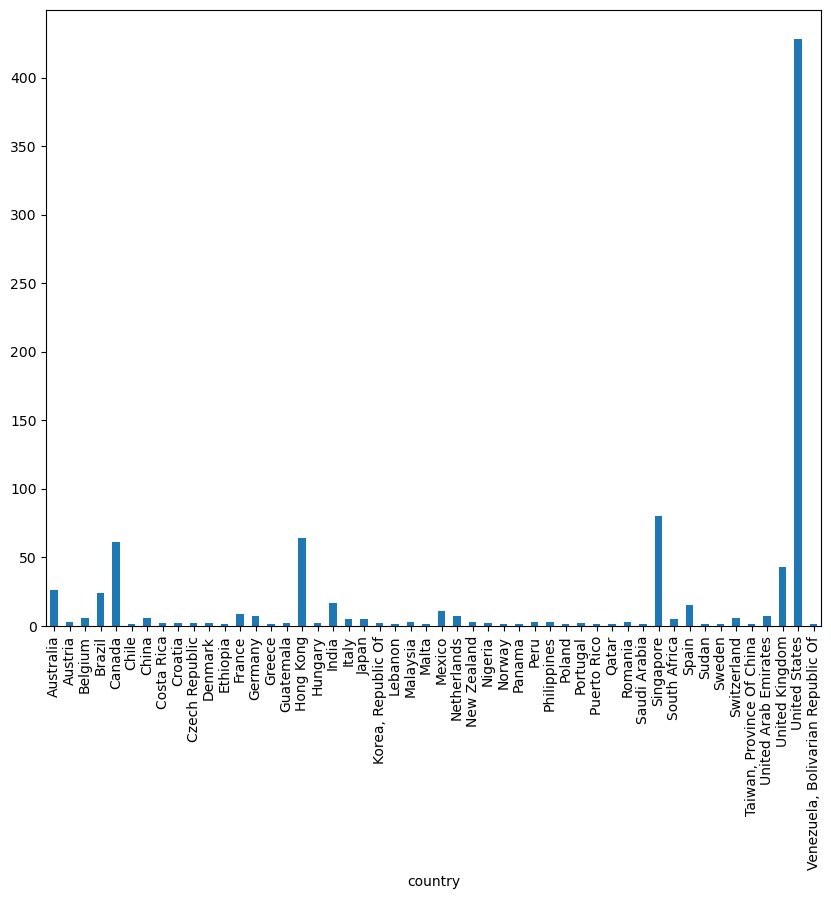

In [11]:
# Plot the count of students per country.
country_counts = df1.groupby(['country'])['student_count'].sum()

country_counts.plot(kind='bar');

### 1.2.5 Plot the students per industry

In [12]:
# Plot the count of students per industry.
industry_counts = df1.groupby(['industry'])['student_count'].sum()
industry_counts.head()

industry
Agriculture            1
Arts & Education      57
Construction           3
Energy & Transport    16
Engineering           66
Name: student_count, dtype: int64

<br>
<div class="alert alert-info">
<b>Exercise 1 Start: Plot student count.</b>
</div>

### Instructions
#### Plot the count of students per city for a specific country.

1. Create a data frame with the list of cities in your country that are present in this data set. Should the data set be too sparsely or densely populated for your country, you are welcome to select another. Use the variable name "df3" for your subset.

2. Create a bar plot for the cities in this country, indicating the number of students in each city using the sum method.

> **Hint**: 

> Create a new subset of the data set first: 

>  ```new_df = df.loc[df['column'] == 'value']```

<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

### 1.2.6 Prepare the data frame for geocoding

In [11]:
# We tested the geocoder library with town and country as input. 
# Let's create a new column in our dataframe that contains these values.
df1['geocode_input'] = df1['city'] + ', ' + df1['country']

# We also create two additional columns for lattitude and longitude.
df1['lat'], df1['long'] = [0, 0]

# Display the head of the updated dataframe.
df1.head()

,country,city,industry,student_count,geocode_input,lat,long
0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",0,0
1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",0,0
2,Australia,Buddina,ICT,1,"Buddina, Australia",0,0
3,Australia,Carlingford,ICT,1,"Carlingford, Australia",0,0
4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",0,0


## 1.3 Geocoding the data
Next, geocode the cities in the student registrations list in order to display their locations on a map.

> **Important**: 
>
> Executing the cell below is **optional**. This cell will run through a loop and geocode each of the city and country combinations provided as input. This process may take at least 5 minutes as the response time is influenced by the target server capacity.

On a course such as this one, where there is a large number of students, you may experience a delay in response. This opportunity will therefore be used to demonstrate how you can save intermediary results as an output file, which you can then load when resuming your analysis at a later stage, without having to redo all of the processing.

> **Note:**
> 
> The code in the cell below can be uncommented and executed should you wish to do so, but it is not required to complete the notebook.

In [12]:
# Now we use Geocoder in a loop to geocode the cities and update our dataframe.
# Wait until the In[*] indicator on the lefthand side changes to a number before proceeding.
# Uncomment the lines below by removing the '#' from the start of the line should you wish to execute the code.

for i in tqdm(range(len(df1))):
    g = geocoder.google(df1.loc[i,'geocode_input'], key=api_key)
    df1.loc[i,'lat'],  df1.loc[i,'long'] = g.lat, g.lng
    
print('Geocoding complete!')

100%|████████████████████████████████████████████████████████████████████████████████| 690/690 [07:40<00:00,  1.50it/s]

Geocoding complete!


If you opted to execute the cell above, wait for it to complete. The "In[ ]" will show "In[\*]" while being executed, and will change to "In[number]" when complete. If this step has been completed successfully, you will not have to load the data set in the following cell. Should you choose to execute the cell, no harm will be done. You will simply overwrite your geocoded data set with the supplied geocoded data set.

If you opted to not execute the cell above, you will need to execute the cell below to retrieve the data set that has already been geocoded for you, in order to proceed.

In [13]:
# Load geocoded dataset if you chose not to execute.
df1 = pd.read_csv('grouped_geocoded.csv',index_col=0)

In [14]:
# Combine the student and population datasets.
df7 = pd.merge(df1,industry_counts , on='industry', how='left')
df7.head()

,country,city,industry,student_count_x,geocode_input,lat,long,student_count_y
0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",-34.928499,138.600746,319
1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",-33.905320,151.260690,319
2,Australia,Buddina,ICT,1,"Buddina, Australia",-26.690000,153.134000,178
3,Australia,Carlingford,ICT,1,"Carlingford, Australia",-33.777000,151.048000,178
4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",-37.885652,145.165179,178


In [26]:
# Let's look at the dataframe again to see the populated values for latitude and longitude.
df7.head()

,country,city,industry,student_count_x,geocode_input,lat,long,student_count_y
0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",-34.928499,138.600746,319
1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",-33.905320,151.260690,319
2,Australia,Buddina,ICT,1,"Buddina, Australia",-26.690000,153.134000,178
3,Australia,Carlingford,ICT,1,"Carlingford, Australia",-33.777000,151.048000,178
4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",-37.885652,145.165179,178


## 1.4 Saving and retrieving your result
In some cases, you may want to save result sets. You can use this technique to store copies of intermediary results when you do not wish to perform the calculations again when resuming your analysis. This technique may also be used to output the result so that it may be shared or used in other applications. This example demonstrates how to save the file as a CSV in the current working directory, "module_1".

In [6]:
# To save the output to a file you can use the command below and replace "filename_export" with a name of your choice.
df1.to_csv('Lutta_Aswani.csv')

In [7]:
# To load the file you just generated, you can replace the filename below with the one you entered in the previous cell.
# Create a new Pandas dataframe with the file created in the previous cell.
new_df = pd.read_csv('Lutta_Aswani.csv')
new_df.head()

,Unnamed: 0,country,city,industry,student_count,geocode_input,lat,long
0,0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",-34.928499,138.600746
1,1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",-33.905320,151.260690
2,2,Australia,Buddina,ICT,1,"Buddina, Australia",-26.690000,153.134000
3,3,Australia,Carlingford,ICT,1,"Carlingford, Australia",-33.777000,151.048000
4,4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",-37.885652,145.165179


## 1.5 Plotting the geocoded data on a map

Visit the Folium [documentation](http://folium.readthedocs.io/en/latest/) or browse the [GitHub](https://github.com/python-visualization/folium) repository for further instructions and examples on how to plot geocoded data.

Feel free to change the map and try visualizing the count of students per country or the count of students per industry per country.

In [38]:
# Set map center and zoom level.
mapc = [0, 30]
zoom = 2

# Create map object.
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)

# Plot your server location.
folium.CircleMarker(mylocation.latlng,
                    radius=50,
                    popup='My Server Location',
                    fill_color='red'
                   ).add_to(map_osm)

# Plot each of the locations that you geocoded.
for j in range(len(df1)):
    folium.Marker([df1.loc[j,'lat'], df1.loc[j,'long']],
        icon=folium.Icon(color='green',icon='info-sign')
        ).add_to(map_osm)

# Show the map.
map_osm

In [18]:
# Feel free to experiment here with mapping options.
# You can copy and paste the code from the cell above and change markers, zoom level, 
# or add additional features demonstrated on the Folium site in this cell.

# 2. Communicating your analysis

In the orientation module notebook as well as the second notebook in this module, the markdown mechanism was briefly introduced. This mechanism has been used to provide instructions and images to you within these notebooks.

You can select "Help" and then "Markdown" in the Jupyter menu at the top of the screen to take you to additional links.

Use a couple of the cells below to demonstrate your ability to communicate your ideas using markdown. You can state your intention, describe your steps, and include code, comments, and visualizations in the cells below.

<br>
<div class="alert alert-info">
<b>Exercise 2 Start: Markdown.</b>
</div>

### Instructions
#### Getting comfortable with markdown.

> Notebook documents contain the inputs and outputs of an interactive session, as well as additional text that accompanies the code but is not meant for execution. In this way, notebook files can serve as a complete computational record of a session. To this purpose, this exercise requires you to complete the section below using a combination of markdown instructions and code. The content that you submit will not be evaluated critically, but it is important that you display the ability to master the basics of markdown.

In separate cells, create each of the following features as they relate to your understanding of big data and social analytics:
1. A markdown cell containing a combination of headings, text, and lists.
2. A markdown cell containing a link or image.
3. A code cell with no output (for example, loading a library) that contains comments in the cell describing the function of the cell.
4. A code cell with an output (for example, df.head() or a calculation).
5. A code cell that produces a graph or plot.

> **Hints**:

> Make use of sections in previous notebooks, source external components (with references), or generate your own content. You may also obtain additional help from the Jupyter menu bar at the top of this notebook, under "Help", "Markdown", or review the [Jupyter Markdown Documentation]( http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Working%20With%20Markdown%20Cells.ipynb).

> **Note**: 

> Ensure that the cell type is "Markdown" in the menu bar above, and that you "Execute" the markdown cells before saving, downloading, and submitting your notebook to the Online Campus. Should you need to edit a markdown cell after executing it, double-click the white space on the left of the cell.

# Notebook Summary 
By the end of this notebook, We have been able to use geocoding within Python and communicated our ideas using markdown.
 
# List of what we have covered
  - Geocoding.
  - tqdm.
  - API's.
  - Markdown.

# Markdown Example with Link and Image
Follow this link to access Pathways Technologies home page [Pathways Technologies](https://www.pathwaystechnologies.com).
Also you can access the Companies image from this link [Pathways Technologies logo](https://uploads-ssl.webflow.com/63d0f3c15fb5c94dd2da409b/63fdbe67887a80278836c5e7_Pathways%20Technologies%20Logo-p-500.png).



#An example of code cell with no output
##import pandas_profiling
import ydata_profiling
# create progress bars for iterable objects in Python, such as lists or loops. 
# The word "tqdm" is Arabic, which means "progress".
from tqdm import tqdm

# An example of code cell with an output
# Importing necessary libraries
import pandas as pd
import numpy as np

# Loading the dataset
data = pd.read_csv("grouped_geocoded.csv")

# Printing the first few rows of the preprocessed data
df7.head()


In [15]:
# Set map center and zoom level.
mapc = [0, 30]
zoom = 2

# Create map object.
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)

# Plot each of the locations that you geocoded.
for j in range(len(df7)):
    folium.Marker([df7.loc[j,'lat'], df7.loc[j,'long']],
        icon=folium.Icon(color='green')
        ).add_to(map_osm)

    # Plot a blue circle marker for student count population.
    folium.CircleMarker([df7.loc[j,'lat'], df7.loc[j,'long']],
                    radius=df7.student_count_y[j]/10,
                    popup='Population',
                    color='#3186cc',
                    fill_color='#3186cc',
                   ).add_to(map_osm)
# Show the map.
map_osm

<br>
<div class="alert alert-info">
<b>Exercise 2 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".